## 1. Graph

In [10]:
import networkx as nx

number_of_nodes = 10
erdos_prob = .2

graph = nx.erdos_renyi_graph(number_of_nodes, erdos_prob)
matrix = nx.to_numpy_matrix(graph).A

## 2.1. Dymanic Formulation

In [3]:
def biochemical(n, x, adjecant, row_data):
    F = .05
    B = .002
    R = .003
    
    sigma = 0
    for j in range (0,n):
        sigma = sigma + R*(adjecant[j])*x*row_data[j]
    return x + (F - B*x - sigma)

In [4]:
def birthdead(n, x, adjecant, row_data):
    B = .02
    R = .3
    a = 1
    b = 1
    
    sigma = 0
    for j in range (0,n):
        sigma = sigma + R*(adjecant[j])*pow(row_data[j],a)
    return x + (-B*pow(x,b) + sigma)

In [5]:
def epidemic(n, x, adjecant, row_data):
    B = .02
    R = .3
    b = 1
    
    sigma = 0
    for j in range (0,n):
        sigma = sigma + R*(adjecant[j])*(1-x)*row_data[j]
    return x + (-B*pow(x,b) + sigma)

## 2.2. Generate Time-series

In [11]:
import numpy as np

number_of_times = 1000
data = np.empty([number_of_times, number_of_nodes]) 
# todo: initial state?
data.fill(.5)

for t in range(0,number_of_times-1):
    for i in range(0,number_of_nodes):
        data[t+1,i] = biochemical(number_of_nodes, data[t,i], matrix[i], data[t])

## 2.3. Correlation Matrix Disribution

In [116]:
from math import ceil

g = np.empty([number_of_times, number_of_nodes, number_of_nodes])
tmp = np.empty((number_of_times-1)*ceil(number_of_nodes*(number_of_nodes-1)/2))
index = 0
for t in range(0,number_of_times-1):
    for i in range(0,number_of_nodes):
        for j in range(0,number_of_nodes):
            # todo: devide by zero (steady state)?
            g[t, i, j] = abs(((data[t+1, i] - data[t, i])/data[t, i])/((data[t+1, j] - data[t, j])/data[t, j]))
            if i > j:
                tmp[index] = min(g[t,i,j], 40)
                index = index + 1

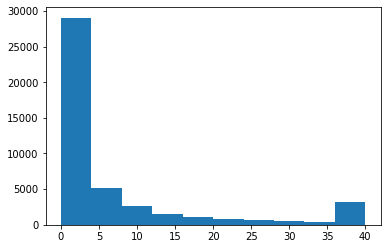

In [117]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(tmp)
plt.show()

## 3. Fit SINDy

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from sklearn.linear_model import Lasso

import pysindy as ps

stlsq_optimizer = ps.STLSQ(threshold=.0005, alpha=.5)

model = ps.SINDy(optimizer=stlsq_optimizer)
model.fit(data, t=1)
model.print()

x0' = 0.049 1 + -3176.441 x0 + -15034.366 x1 + 12895.996 x2 + 270.709 x3 + -11729.519 x4 + 999.969 x5 + -436.797 x6 + 12895.917 x7 + 270.707 x8 + 3043.816 x9 + -6364.221 x0^2 + 2173.455 x0 x1 + 6956.254 x0 x2 + -7528.401 x0 x3 + 7721.905 x0 x4 + 7007.787 x0 x5 + -5835.178 x0 x6 + 6956.223 x0 x7 + -7506.002 x0 x8 + 1530.598 x1^2 + 3595.189 x1 x4 + -374.798 x1 x6 + -1530.960 x2 x3 + 756.638 x2 x4 + -82.163 x2 x6 + -1530.960 x2 x8 + 73.964 x3^2 + 3872.800 x3 x4 + -1591.297 x3 x7 + 43.976 x3 x8 + -2183.138 x4^2 + -490.305 x4 x6 + 756.660 x4 x7 + 3872.800 x4 x8 + -9576.474 x4 x9 + -82.155 x6 x7 + 814.820 x6 x9 + -1530.971 x7 x8 + 73.959 x8^2
x1' = 0.054 1 + 26416.572 x0 + 6230.887 x1 + 17590.388 x2 + 15627.346 x3 + -37718.098 x4 + -3569.629 x5 + -6981.996 x6 + 17590.865 x7 + 15626.993 x8 + -50813.353 x9 + 3089.704 x0^2 + 2856.892 x0 x1 + 6143.084 x0 x4 + -7830.643 x0 x5 + 2000.204 x0 x6 + -4967.357 x0 x9 + -38.909 x1^2 + -1654.729 x1 x4 + -201.123 x1 x6 + -1333.262 x2^2 + -3335.821 x2 x3 + 